# Baseball Case Study

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
# pd.set_option('display.max_rows',None)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

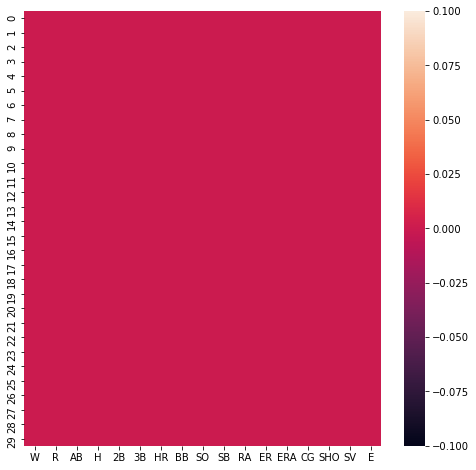

In [7]:
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Lets check Outliers:

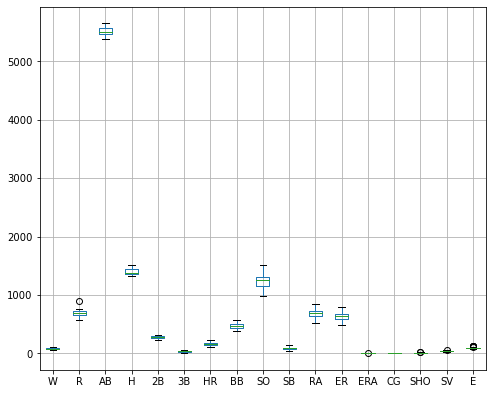

In [9]:
df.iloc[:,0:18].boxplot(figsize=[8,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Lets Analyse th data in detail:

In [10]:
collist=df.columns.values
collist

array(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype=object)

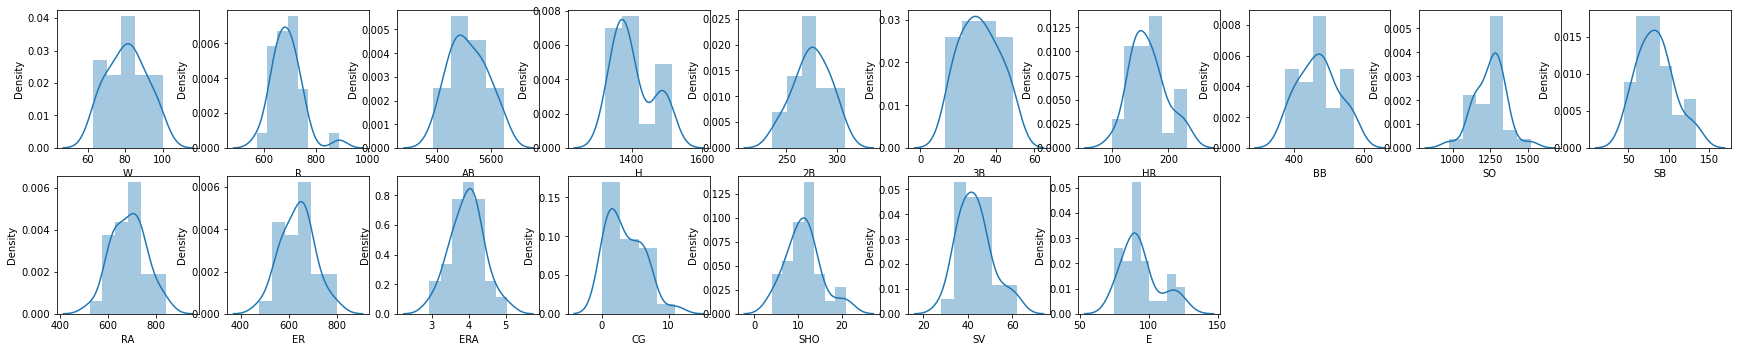

In [11]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

# EDA

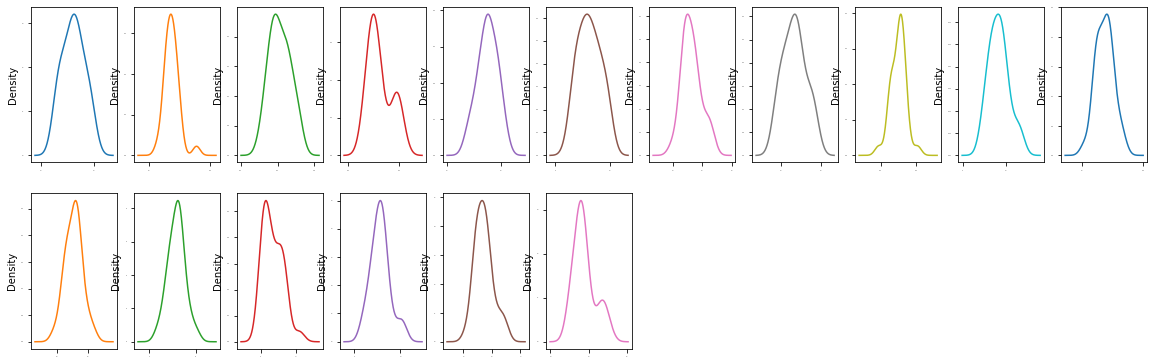

In [12]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

# Univariate Analysis :

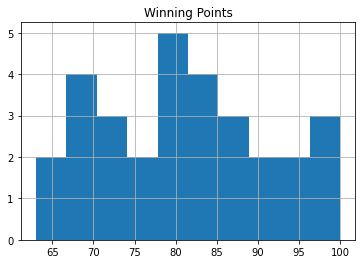

In [13]:
df["W"].hist(grid=True)
plt.title("Winning Points")
plt.show()

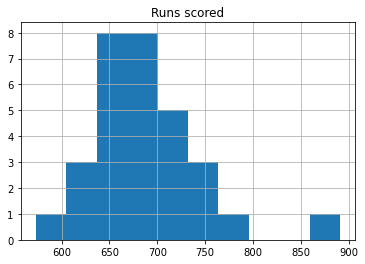

In [14]:
df["R"].hist(grid=True)
plt.title("Runs scored")
plt.show()

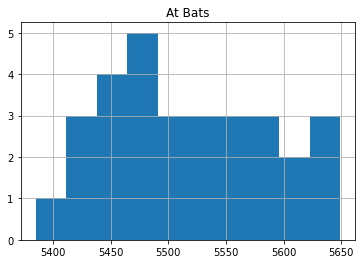

In [15]:
df["AB"].hist(grid=True)
plt.title("At Bats")
plt.show()

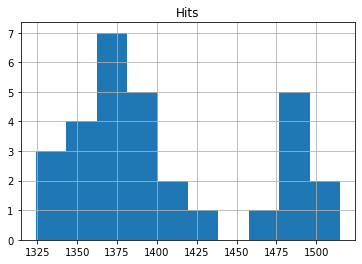

In [16]:
df["H"].hist(grid=True)
plt.title("Hits")
plt.show()

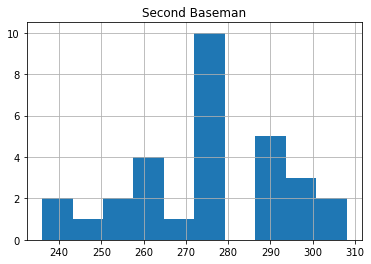

In [17]:
df["2B"].hist(grid=True)
plt.title("Second Baseman")
plt.show()

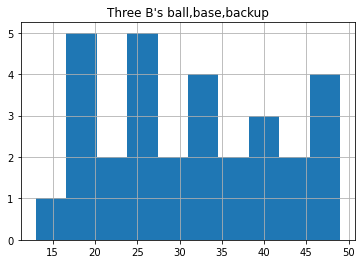

In [18]:
df["3B"].hist(grid=True)
plt.title("Three B's :ball,base,backup")
plt.show()

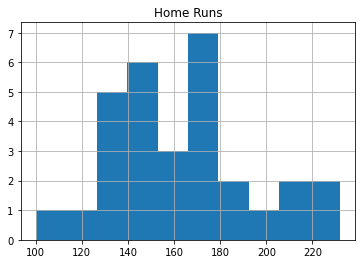

In [19]:
df["HR"].hist(grid=True)
plt.title("Home Runs")
plt.show()

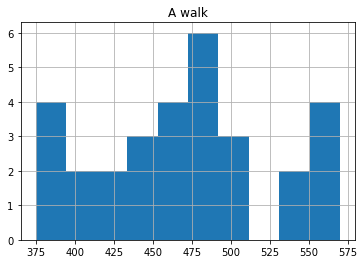

In [20]:
df["BB"].hist(grid=True)
plt.title("A walk")
plt.show()

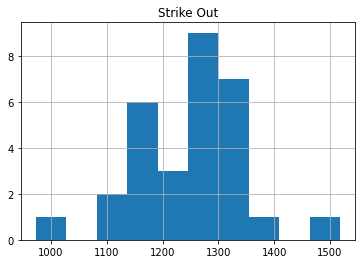

In [21]:
df["SO"].hist(grid=True)
plt.title("Strike Out")
plt.show()

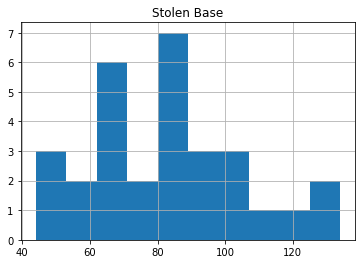

In [22]:
df["SB"].hist(grid=True)
plt.title("Stolen Base")
plt.show()

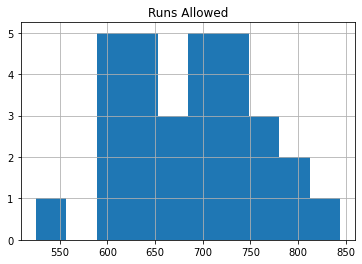

In [23]:
df["RA"].hist(grid=True)
plt.title("Runs Allowed")
plt.show()

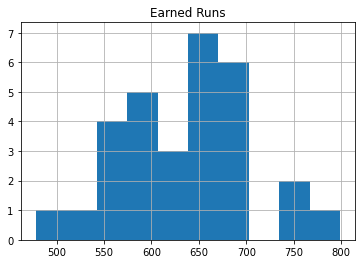

In [24]:
df["ER"].hist(grid=True)
plt.title("Earned Runs")
plt.show()

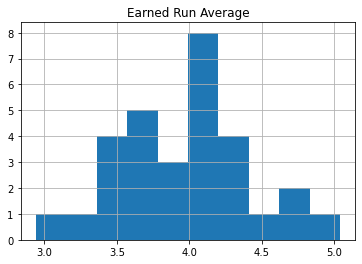

In [25]:
df["ERA"].hist(grid=True)
plt.title("Earned Run Average")
plt.show()

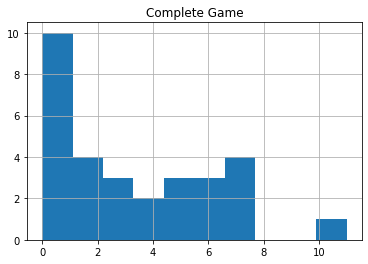

In [26]:
df["CG"].hist(grid=True)
plt.title("Complete Game")
plt.show()

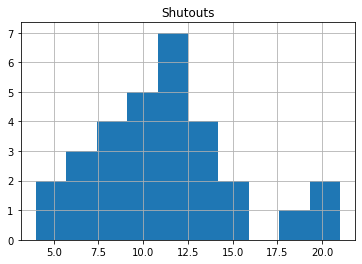

In [27]:
df["SHO"].hist(grid=True)
plt.title("Shutouts")
plt.show()

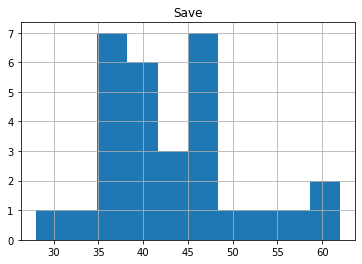

In [28]:
df["SV"].hist(grid=True)
plt.title("Save")
plt.show()

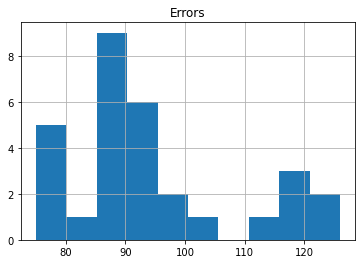

In [29]:
df["E"].hist(grid=True)
plt.title("Errors")
plt.show()

# Bivariate Analsis :

<AxesSubplot:title={'center':'Winings By Runs scored'}, xlabel='W', ylabel='R'>

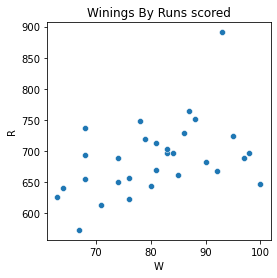

In [30]:
plt.figure(figsize=[4,4])
plt.title('Winings By Runs scored')
sns.scatterplot(df['W'],df['R'],palette='bright')

<AxesSubplot:title={'center':'Winings By AtBats'}, xlabel='W', ylabel='AB'>

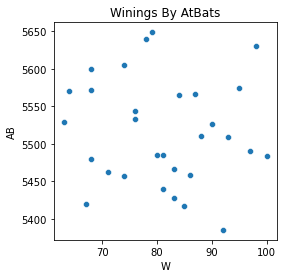

In [31]:
plt.figure(figsize=[4,4])
plt.title('Winings By AtBats')
sns.scatterplot(df['W'],df['AB'],palette='bright')

<AxesSubplot:title={'center':'Winings By Home Runs'}, xlabel='W', ylabel='HR'>

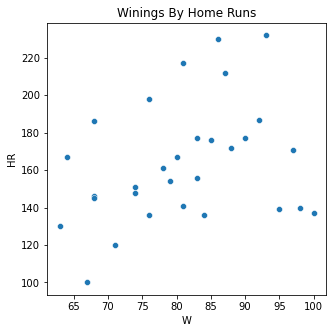

In [32]:
plt.figure(figsize=[5,5])
plt.title('Winings By Home Runs')
sns.scatterplot(df['W'],df['HR'],palette='bright')

<AxesSubplot:title={'center':'Win By Earned Run Average'}, xlabel='W', ylabel='ERA'>

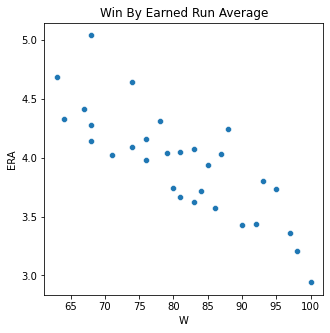

In [33]:
plt.figure(figsize=[5,5])
plt.title('Win By Earned Run Average')
sns.scatterplot(df['W'],df['ERA'],palette='bright')

<AxesSubplot:title={'center':'Winings By Double'}, xlabel='W', ylabel='2B'>

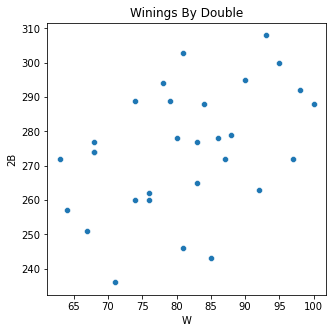

In [34]:
plt.figure(figsize=[5,5])
plt.title('Winings By Double')
sns.scatterplot(df['W'],df['2B'],palette='bright')

<AxesSubplot:title={'center':'Winings By Triple'}, xlabel='W', ylabel='3B'>

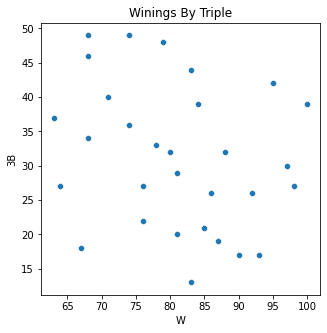

In [35]:
plt.figure(figsize=[5,5])
plt.title('Winings By Triple')
sns.scatterplot(df['W'],df['3B'],palette='bright')

<AxesSubplot:title={'center':'Winings By Walk BB'}, xlabel='W', ylabel='BB'>

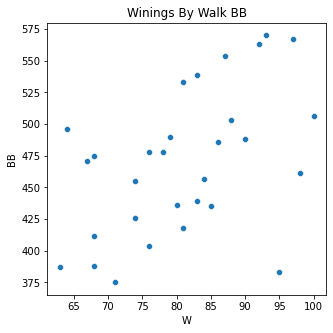

In [36]:
plt.figure(figsize=[5,5])
plt.title('Winings By Walk BB')
sns.scatterplot(df['W'],df['BB'],palette='bright')

<AxesSubplot:title={'center':'Runs Allowed Vs Earned Run'}, xlabel='RA', ylabel='ER'>

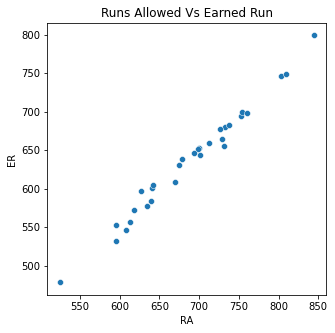

In [37]:
plt.figure(figsize=[5,5])
plt.title('Runs Allowed Vs Earned Run')
sns.scatterplot(df['RA'],df['ER'],palette='bright')

<AxesSubplot:title={'center':'Runs Allowed Vs Earned Run Average'}, xlabel='RA', ylabel='ERA'>

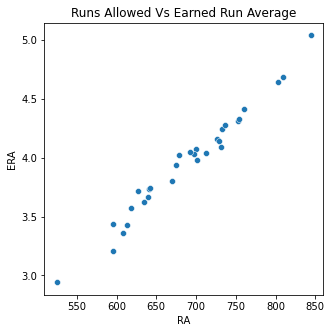

In [38]:
plt.figure(figsize=[5,5])
plt.title('Runs Allowed Vs Earned Run Average')
sns.scatterplot(df['RA'],df['ERA'],palette='bright')

<AxesSubplot:title={'center':'ER VS ERA'}, xlabel='ER', ylabel='ERA'>

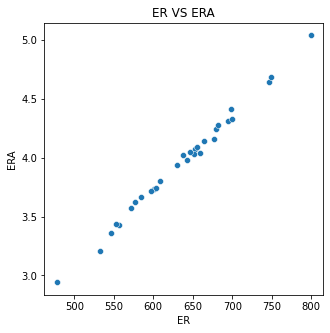

In [39]:
plt.figure(figsize=[5,5])
plt.title('ER VS ERA')
sns.scatterplot(df['ER'],df['ERA'],palette='bright')

# Multi Variate Analysis :

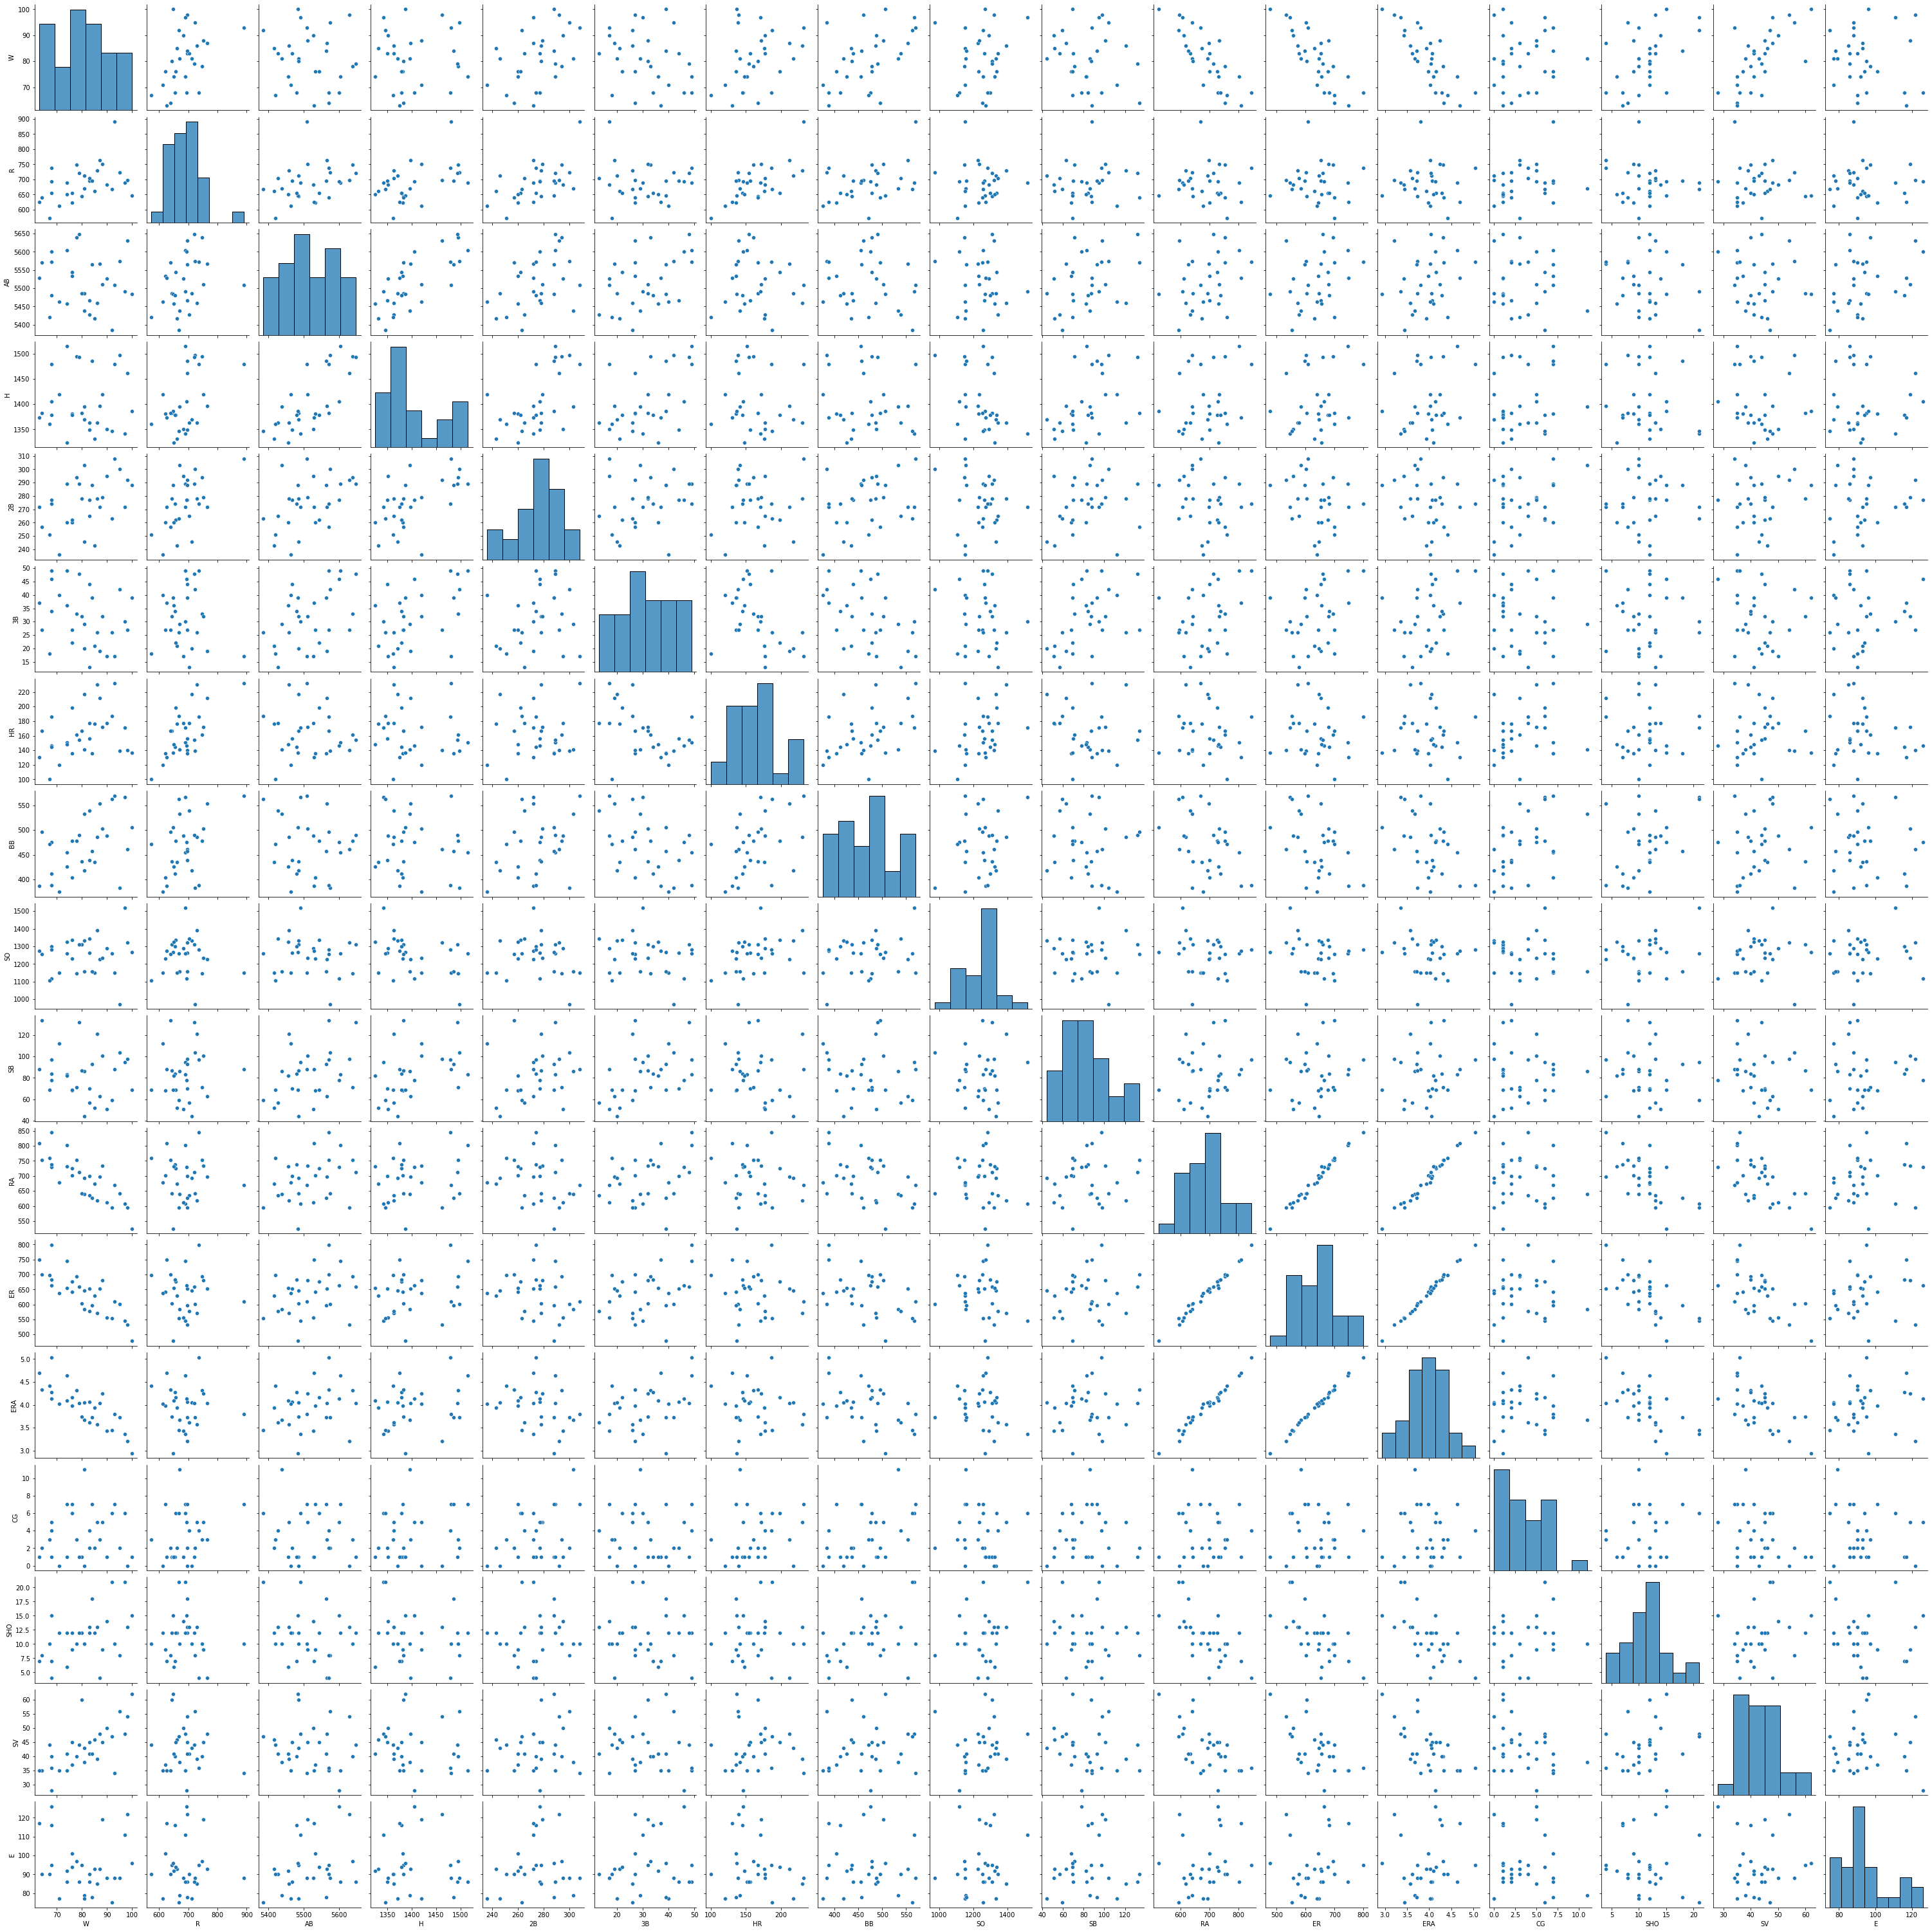

In [40]:
sns.pairplot(df,palette='bright')

In [41]:
corr_mat=df.corr()
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


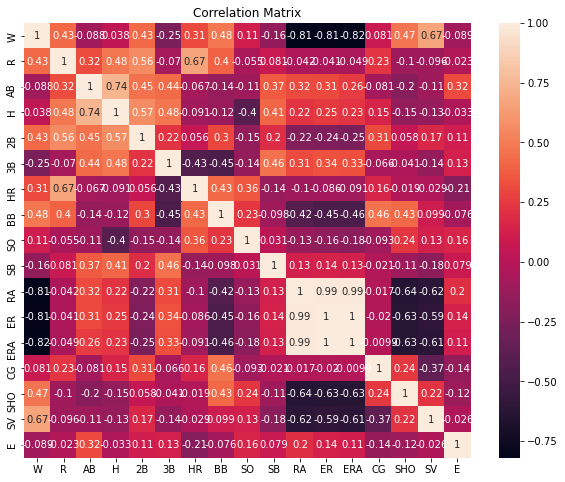

In [42]:
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outliers and Skewness 

In [43]:
df_new=df.copy()

W         AxesSubplot(0.125,0.536818;0.0731132x0.343182)
R      AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
AB     AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
H      AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
2B     AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
3B     AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
HR     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
BB     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
SO     AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
SB           AxesSubplot(0.125,0.125;0.0731132x0.343182)
RA        AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ER        AxesSubplot(0.300472,0.125;0.0731132x0.343182)
ERA       AxesSubplot(0.388208,0.125;0.0731132x0.343182)
CG        AxesSubplot(0.475943,0.125;0.0731132x0.343182)
SHO       AxesSubplot(0.563679,0.125;0.0731132x0.343182)
SV        AxesSubplot(0.651415,0.125;0.0731132x0.343182)
E         AxesSubplot(0.739151,0.125;0.0731132x0.343182)
dtype: object

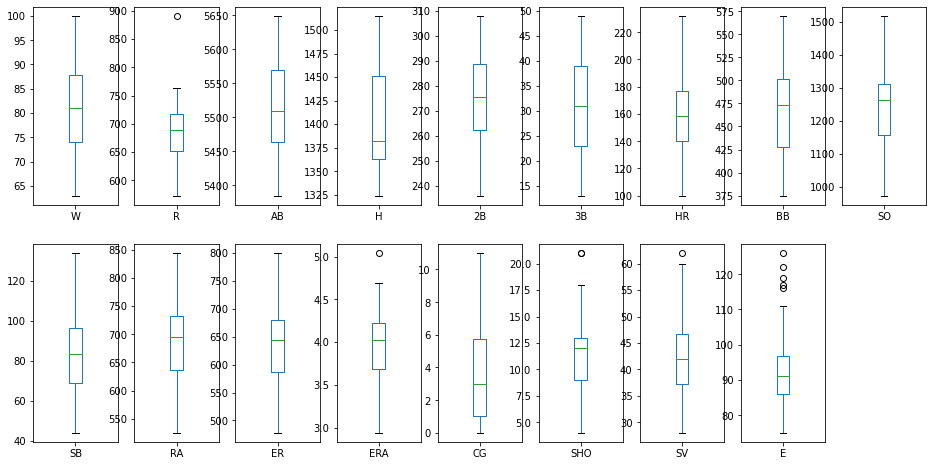

In [44]:
df_new.plot(kind='box',subplots=True,layout=(2,9),figsize=[16,8])

# Outliers Removal:

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
df_zscore=df_new[(z<3).all(axis=1)]

In [46]:
df_zscore.shape

(29, 17)

In [47]:
df_new.shape

(30, 17)

In [48]:
((30-29)/30)*100

3.3333333333333335

In [49]:
df_zscore.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Skewness:

In [50]:
df_new.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [51]:
x=df_zscore.drop("W",axis=1)
y=df_zscore["W"]

# Skewness Removal:

In [52]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [53]:
df_skew.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [54]:
x=df_skew

In [55]:
x.shape

(29, 16)

In [56]:
y.shape

(29,)

In [57]:
df_skew.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,2.900000e+01,29.0,29.0,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,-2.044342e-15,0.0,0.0,-1.856752e-16,1.148507e-16,-8.269247e-16,3.208162e-15,4.651452e-16,-7.580143e-16,-3.981489e-16,-9.953724e-16,7.809845e-16,3.120110e-16,-2.756416e-16,-1.952461e-16,1.188704e-12
std,1.017700e+00,0.0,0.0,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-2.256817e+00,0.0,0.0,-1.995042e+00,-2.015649e+00,-2.478298e+00,-1.778543e+00,-2.550612e+00,-2.082843e+00,-2.300969e+00,-2.286771e+00,-2.266376e+00,-1.732896e+00,-2.064039e+00,-2.498840e+00,-1.870191e+00
25%,-7.250804e-01,0.0,0.0,-7.298467e-01,-5.355899e-01,-7.030257e-01,-7.172730e-01,-9.169708e-01,-5.671018e-01,-7.449477e-01,-7.522139e-01,-6.420976e-01,-8.706817e-01,-5.135549e-01,-6.641367e-01,-5.408198e-01
50%,1.377373e-01,0.0,0.0,-4.397557e-02,6.870349e-02,-1.099584e-01,1.427585e-01,9.368329e-02,9.503777e-02,1.325173e-01,1.359201e-01,1.532762e-01,1.218706e-01,2.367365e-01,5.232535e-02,1.904854e-03
75%,6.981456e-01,0.0,0.0,8.442215e-01,7.326782e-01,5.961681e-01,5.942265e-01,5.763758e-01,6.723937e-01,6.161733e-01,6.203456e-01,6.156852e-01,7.706490e-01,4.680294e-01,5.585089e-01,3.833856e-01
max,1.964209e+00,0.0,0.0,1.907385e+00,1.622636e+00,2.109761e+00,1.789632e+00,2.791487e+00,1.925528e+00,2.133800e+00,2.302801e+00,2.367642e+00,2.011315e+00,2.090856e+00,2.084917e+00,1.810553e+00


# Finding Best Random State:

In [58]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.9508451216581015   at random_state: 104


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

In [60]:
x_train.shape

(23, 16)

In [61]:
x_test.shape

(6, 16)

In [62]:
y_train.shape

(23,)

In [63]:
y_test.shape

(6,)

# Lets Try with different models for select good accuracy model:

# Model Building:

In [64]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [ 5.23497807e+00 -3.10862447e-15  6.21724894e-15 -1.95369290e+00
  6.76759507e-01 -1.62609426e+00 -1.85015452e+00  2.75621723e-01
 -6.61148585e-01  8.30885411e+00 -2.49888880e+00 -1.19861183e+01
  2.62575206e+00  7.84851612e-01  5.16017013e+00 -4.83916211e-01]
Intercept   :  80.35450823183317
Score       :  0.943266047554198
 
error
Mean absolute error    : 2.3946846943886775
Mean squared error     : 6.123878593428187
Root mean squared error: 2.4746471654416085
 
r2 score :  0.9508451216581015


In [65]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [  5.27196491   0.           0.          -1.97984698   0.66312281
  -1.61636054  -1.85395874   0.21982367  -0.60049576   9.18917394
  -4.88128635 -10.35928825   2.63551198   0.86167353   5.2922309
  -0.48506793]
Intercept   :  80.36268074999461
Score       :  0.9431925866513008
 
error
Mean absolute error    : 2.4248853724357438
Mean squared error     : 6.191606941031712
Root mean squared error: 2.488293982035023
 
r2 score :  0.9503014827475715


In [66]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [  5.235317     0.           0.          -1.95341061   0.67658645
  -1.62670835  -1.84967203   0.27593057  -0.66110562   8.3045975
  -2.50913946 -11.97118946   2.62536489   0.78494025   5.1602417
  -0.48336017]
Intercept   :  80.35442586786942
Score       :  0.9432660392512113
 
error
Mean absolute error    : 2.394763012141945
Mean squared error     : 6.123452288866242
Root mean squared error: 2.474561029529529
 
r2 score :  0.9508485435007392


In [67]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9516250211310896
 
error
Mean absolute error    : 5.858333333333332
Mean squared error     : 54.01924999999998
Root mean squared error: 7.349778908239347
 
r2 score :  0.5664006688963212


In [68]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9999999652638769
 
error
Mean absolute error    : 7.638093263845353
Mean squared error     : 67.2745728150575
Root mean squared error: 8.20210782756832
 
r2 score :  0.4600034289092375


In [69]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.981435734955186
 
error
Mean absolute error    : 6.724206349206351
Mean squared error     : 54.50200774754348
Root mean squared error: 7.382547510686503
 
r2 score :  0.5625256903207212


In [70]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Wining : ", pred )
print("Actual Wining :", y_test)

Predicted Wining :  [89.60275559 62.53137811 69.1938799  87.36086602 78.13054354 84.46131556]
Actual Wining : 25    92
19    64
23    67
20    90
13    76
10    88
Name: W, dtype: int64


# CrossValidation Checking :

In [71]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(lm,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.6041131421132073


In [72]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(ls,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.6060249620194011


In [73]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(rd,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.6044983511155217


In [74]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(rf,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.6323786412738878


In [75]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(gbr,x,y,cv=cv1,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.48120999679441334


In [76]:
cv1 = KFold(n_splits=5, shuffle=True,random_state=maximum_randomstate)
scr=cross_val_score(adb,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.5726297321435206


# Parameter Tuning :

### 1st RandomForest Tuning:

In [77]:
parameters={"max_depth":range(2,8),"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [78]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [79]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 8)},
             scoring='r2')

In [80]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 6}

In [81]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',max_depth=3,random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

58.05338461538461


### 2nd AdaBoost Tuning:

In [82]:
#AdaBoostRegressor
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [83]:
gcv=GridSearchCV(AdaBoostRegressor(), param_dist,cv=5,scoring="r2") #Tuning

In [84]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [335]:
gcv.best_params_

{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}

In [85]:
mod2=AdaBoostRegressor(learning_rate= 0.05,loss='exponential',n_estimators= 50,random_state=maximum_randomstate)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred)*100)

56.127530164797236


### 3rd Gradient Tuning:

In [86]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [87]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2") #Tuning

In [88]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [90]:
gcv.best_params_

{'learning_rate': 0.03,
 'max_depth': 10,
 'n_estimators': 1000,
 'subsample': 0.2}

In [91]:
mod3=GradientBoostingRegressor(learning_rate=0.03,max_depth=10,n_estimators=1000,subsample= 0.2,random_state=maximum_randomstate)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

58.864546735472956


### 4th Linear Regression Tuning:

In [92]:
#Linear Regression:
parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False)}

In [93]:
gcv=GridSearchCV(LinearRegression(), parameters,cv=5,scoring="r2") #Tuning

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': (True, False),
                         'fit_intercept': (True, False),
                         'normalize': (False, True)},
             scoring='r2')

In [95]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [96]:
mod4=LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
mod4.fit(x_train,y_train)
pred=mod4.predict(x_test)
print(r2_score(y_test,pred)*100)

95.08451216581015


# Obsevation: LinearRegressor is the one having least RMSE an good R2score of 95%.Lets take this for saving.

# Saving the model :

In [97]:
import joblib
joblib.dump(mod4,"Baseball.pkl")

['Baseball.pkl']

In [98]:
model=joblib.load("Baseball.pkl")

In [99]:
prediction=model.predict(x_test)

In [100]:
print(r2_score(y_test,prediction)*100)

95.08451216581015


In [101]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [102]:
prediction.to_csv('Baseball.csv') #Saving the predictions

In [103]:
prediction

,0
0,89.602756
1,62.531378
2,69.193880
3,87.360866
4,78.130544
5,84.461316


## Conclution & Observation:
Hence we have got Best accuracy with LinearRegression model.
We have saved and loaded that for checking purpose and predicted in above steps.


# Linear Regression  having good output with 95% accuracy